# Introducing API requests and loading dataset of conflicts in Africa

Theres's a first part where I get acquainted with API requests and a second where I try to get data on conflicts in Africa and plot them

In [1]:
import requests
import json

response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [5]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent = 2)
    print(text)

jprint(response.json())

{
  "message": "success",
  "number": 11,
  "people": [
    {
      "craft": "ISS",
      "name": "Raja Chari"
    },
    {
      "craft": "ISS",
      "name": "Tom Marshburn"
    },
    {
      "craft": "ISS",
      "name": "Kayla Barron"
    },
    {
      "craft": "ISS",
      "name": "Matthias Maurer"
    },
    {
      "craft": "ISS",
      "name": "Oleg Artemyev"
    },
    {
      "craft": "ISS",
      "name": "Denis Matveev"
    },
    {
      "craft": "ISS",
      "name": "Sergey Korsakov"
    },
    {
      "craft": "ISS",
      "name": "Kjell Lindgren"
    },
    {
      "craft": "ISS",
      "name": "Bob Hines"
    },
    {
      "craft": "ISS",
      "name": "Samantha Cristoforetti"
    },
    {
      "craft": "ISS",
      "name": "Jessica Watkins"
    }
  ]
}


In [6]:
ged_example = requests.get("https://ucdpapi.pcr.uu.se/api/gedevents/21.1?pagesize=1")
print(ged_example.status_code)

jprint(ged_example.json())

200
{
  "NextPageUrl": "https://ucdpapi.pcr.uu.se/api/gedevents/21.1?pagesize=1&page=1",
  "PreviousPageUrl": "",
  "Result": [
    {
      "active_year": true,
      "adm_1": "Punjab state",
      "adm_2": "Amritsar district",
      "best": 3,
      "code_status": "Clear",
      "conflict_dset_id": "319",
      "conflict_name": "Sikh insurgents - Civilians",
      "conflict_new_id": 519,
      "country": "India",
      "country_id": 750,
      "date_end": "1989-01-01T00:00:00",
      "date_prec": 1,
      "date_start": "1989-01-01T00:00:00",
      "deaths_a": 0,
      "deaths_b": 0,
      "deaths_civilians": 3,
      "deaths_unknown": 0,
      "dyad_dset_id": "319",
      "dyad_name": "Sikh insurgents - Civilians",
      "dyad_new_id": 986,
      "event_clarity": 1,
      "geom_wkt": "POINT (75.082214 31.71479)",
      "gwnoa": "",
      "gwnob": "",
      "high": 3,
      "id": 85670,
      "latitude": 31.71479,
      "longitude": 75.082214,
      "low": 3,
      "number_of_sources":

In [16]:
countries_list = "615, 540, 571, 835, 439, 516, 471, 482, 483, 484, 490, 522, 651, 411, 531, 530, 481, 420, 452, 438, 404, 437, 501, 570, 450, 620, 580,  432, 600, 541, 565, 436, 475, 517, 433, 451, 520, 560, 625, 115, 572,510, 461, 616, 500, 551, 511, 552"

r = requests.get(f"https://ucdpapi.pcr.uu.se/api/gedevents/21.1?pagesize=1000&country=" + countries_list + "&StartDate=1990-01-01&EndDate=2021-01-01")
print(r.status_code)

import pandas as pd

data = r.json()

df_dict = pd.json_normalize(data['Result'])

df = pd.DataFrame.from_dict(df_dict)

print("dataframe size: ", df.shape)
print(" ")
print("the instances come from: ", str(df.region.unique()))

200
dataframe size:  (1000, 49)
 
the instances come from:  ['Africa' 'Middle East']


In [17]:
def add_data(url, df):
    
    page = requests.get(url)
    print(page.status_code)
    moment_data = page.json()
    moment_df_dict = pd.json_normalize(moment_data['Result'])
    moment_df = pd.DataFrame.from_dict(moment_df_dict)
    
    df = pd.concat([df, moment_df])
    print(df.shape)
    
    url = data['NextPageUrl']
    
    return df

In [18]:
url = data['NextPageUrl']

for i in range(50):
    
    df = add_data(url, df)

200
(2000, 49)
200
(3000, 49)
200
(4000, 49)
200
(5000, 49)
200
(6000, 49)
200
(7000, 49)
200
(8000, 49)
200
(9000, 49)
200
(10000, 49)
200
(11000, 49)
200
(12000, 49)
200
(13000, 49)
200
(14000, 49)
200
(15000, 49)
200
(16000, 49)
200
(17000, 49)
200
(18000, 49)
200
(19000, 49)
200
(20000, 49)
200
(21000, 49)
200
(22000, 49)
200
(23000, 49)
200
(24000, 49)
200
(25000, 49)
200
(26000, 49)
200
(27000, 49)
200
(28000, 49)
200
(29000, 49)
200
(30000, 49)
200
(31000, 49)
200
(32000, 49)
200
(33000, 49)
200
(34000, 49)
200
(35000, 49)
200
(36000, 49)
200
(37000, 49)
200
(38000, 49)
200
(39000, 49)
200
(40000, 49)
200
(41000, 49)
200
(42000, 49)
200
(43000, 49)
200
(44000, 49)
200
(45000, 49)
200
(46000, 49)
200
(47000, 49)
200
(48000, 49)
200
(49000, 49)
200
(50000, 49)
200
(51000, 49)


# Let's now try plotting the results with cartopy

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

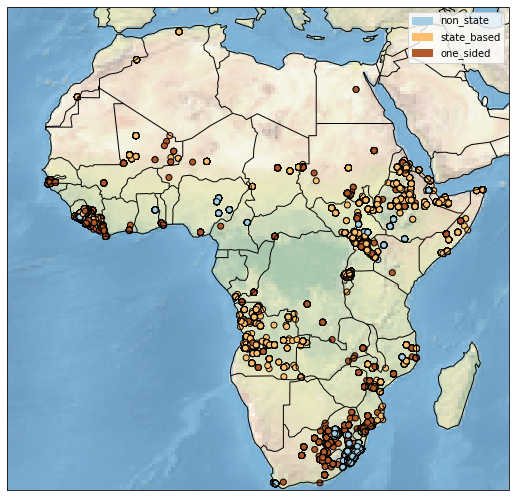

In [19]:
crs_lonlat = ccrs.PlateCarree()
extent_lonlat = [-23, 55, -35, 40] #necessary to get Africa
subplot_kw = dict(projection=crs_lonlat)

violence_dict = {1 : "state_based", 2 : "non_state", 3 : "one_sided"}

for i in violence_dict.keys():
    
    df.loc[df['type_of_violence'] == i, 'type_of_violence'] = violence_dict[i]

cmap = matplotlib.cm.get_cmap('Paired')
color_indexer = np.linspace(0, 1, len(df['type_of_violence'].unique()))
color_list = cmap(color_indexer)
color_dict = dict(zip(df['type_of_violence'].unique(), color_list))

df['color'] = df['type_of_violence'].map(color_dict)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

# plot content 

ax.set_extent(extent_lonlat, crs=crs_lonlat)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.BORDERS)

plt.scatter(x=df.longitude, y=df.latitude,
            color= df.color, edgecolors='black',
            transform=ccrs.PlateCarree()) ## Important

# legend

import matplotlib.patches as mpatches

legend_list = []

for conflict in df['type_of_violence'].unique():
    
    legend_list.append(mpatches.Patch(color=color_dict[conflict], label=conflict))
    
plt.legend(handles=legend_list)

plt.savefig('conflict_distribution_1990-2021.pdf')

plt.show()